In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from jupyter_datatables import init_datatables_mode
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [32]:
# Data reading
data = pd.read_csv("dataset.csv")
data.head()

,UID,Name,PositionsDesc,Goal Opportunity,Goal Opportunity - 2,NationID,Born,Age,IntCaps,IntGoals,...,InjuryProness_Technical,Versatility_Behavioral,Adaptability_Behavioral,Ambition_Behavioral,Loyalty_Behavioral,Pressure_Behavioral,Professional_Behavioral,Sportsmanship_Behavioral,Temperament_Behavioral,Controversy_Behavioral
0,1000055,Wilfred Bamnjo,DM,maybe,No,11,27-03-1980,36,0,0,...,7,4,20,6,3,9,3,10,14,11
1,1000331,Wang Wei,GK,No,No,110,20-02-1982,34,0,0,...,6,6,14,10,7,11,11,12,10,6
2,1000334,Liu Yang,DM,maybe,No,110,11-04-1982,34,0,0,...,5,5,9,11,14,7,11,13,10,8
3,1000337,Song Qi,S,Yes,Yes,110,07-04-1985,31,0,0,...,5,6,16,13,11,9,10,13,13,7
4,1000340,Chen Lei,S,Yes,Yes,110,20-01-1983,33,0,0,...,5,5,13,11,9,10,12,10,19,8


In [3]:
#International matches>0
data_int = data[data["IntCaps"]>0]
#data_int.describe()

In [4]:
# classifier_ = []
# for i in range(0, len(data_int)):#8
#     if data_int.iloc[i][8] <7:
#         classifier_.append(0)
#         continue
#     classifier_.append(1)

# data_int["classifier"] = classifier_


classifier_ = []
for i in range(0, len(data)):#8
    if data.iloc[i][8] <1:#<1
        classifier_.append(0)
        continue
    classifier_.append(1)

data["classifier"] = classifier_

In [5]:
from imblearn.over_sampling import SMOTE as alg#SMOTE
df_train = data
x = df_train.iloc[:,15:-1]
y = df_train["classifier"]
sm = alg(sampling_strategy = 0.35,random_state=0)
oversampled_X, oversampled_Y = sm.fit_resample(x,y)
data_f = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)
data_f['classifier'].value_counts()

0    149905
1     52466
Name: classifier, dtype: int64

In [6]:
pred_0 = data[data["classifier"]==0]
pred_1 = data[data["classifier"]==1]
pred_1_upsample = resample(pred_1, replace=True, n_samples=50000)#, random_state=0
data_f = pd.concat([pred_0, pred_1_upsample])
data_f['classifier'].value_counts()
x__ = data_f.iloc[:,15:-1]
y__ = data_f["classifier"]
print(y__.value_counts())

print(pred_1["classifier"].value_counts())



0    149905
1     50000
Name: classifier, dtype: int64
1    9636
Name: classifier, dtype: int64


In [7]:
list(data.columns[15:-1])

['AerialAbility_Technical',
 'CommandOfArea_Technical',
 'Communication_Behavioral',
 'Eccentricity_Behavioral',
 'Handling_Technical',
 'Kicking_Technical',
 'OneOnOnes_Technical',
 'Reflexes_Technical',
 'RushingOut_Technical',
 'TendencyToPunch_Technical',
 'Throwing_Technical',
 'Corners_Technical',
 'Crossing_Technical',
 'Dribbling_Technical',
 'Finishing_Technical',
 'FirstTouch_Technical',
 'Freekicks_Technical',
 'Heading_Technical',
 'LongShots_Technical',
 'Longthrows_Technical',
 'Marking_Technical',
 'Passing_Technical',
 'PenaltyTaking_Technical',
 'Tackling_Technical',
 'Technique_Technical',
 'Aggression_Behavioral',
 'Anticipation_Behavioral',
 'Bravery_Behavioral',
 'Composure_Behavioral',
 'Concentration_Behavioral',
 'Vision_Behavioral',
 'Decisions_Behavioral',
 'Determination_Behavioral',
 'Flair_Behavioral',
 'Leadership_Behavioral',
 'OffTheBall_Technical',
 'Positioning_Behavioral',
 'Teamwork_Behavioral',
 'Workrate_Technical',
 'Acceleration_Technical',
 'Agi

Accuracy: 0.9998119633119529
The f1 score for the model is: 0.9984073615289328
The precision score for the model model is: 1.0
The recall score for the model model is: 0.9968197879858657
|--- feature_51 <= 9.50
|   |--- feature_53 <= 9.50
|   |   |--- feature_47 <= 10.50
|   |   |   |--- feature_59 <= 8.50
|   |   |   |   |--- feature_56 <= 5.50
|   |   |   |   |   |--- feature_48 <= 9.50
|   |   |   |   |   |   |--- feature_38 <= 11.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_38 >  11.50
|   |   |   |   |   |   |   |--- feature_12 <= 8.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_12 >  8.50
|   |   |   |   |   |   |   |   |--- feature_50 <= 8.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_50 >  8.50
|   |   |   |   |   |   |   |   |   |--- feature_60 <= 14.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- 

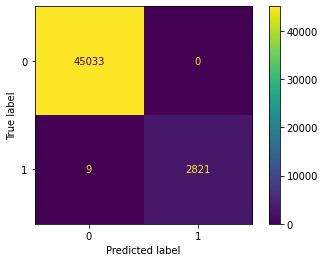

In [8]:
#Resample
def resample_(model,data):
    pred_0 = data[data["classifier"]==0]
    pred_1 = data[data["classifier"]==1]
    pred_1_upsample = resample(pred_1, replace=True, n_samples=50000)#, random_state=0
    data_f = pd.concat([pred_0, pred_1_upsample])
    data_f['classifier'].value_counts()
    x__ = data_f.iloc[:,15:-1]
    y__ = data_f["classifier"]
    y__ = np.array(y__)[:,None]
    x__ = np.array(x__)
    #model.fit(x__, y__)
    return x__, y__

def predict_(x_test, y_test, x_fit, y_fit ,model):
    model.fit(x_fit, y_fit)
    y_pred_test = model.predict_proba(x_test)[:, 1]#0.094060344
    y_pred_class_test = [1 if prob > 0.5 else 0 for prob in y_pred_test]
    y_predicted = np.array(y_pred_class_test).reshape(len(y_pred_class_test), 1) #47863
    arr = np.append(y_predicted, np.array(y_test),1)
    cm = confusion_matrix(y_test, y_predicted)
    accuracy = accuracy_score(y_test, y_predicted)
    print("Accuracy:", accuracy)
    print('The f1 score for the model is:',f1_score(y_test, y_predicted))
    print('The precision score for the model model is:', precision_score(y_test, y_predicted))
    print('The recall score for the model model is:', recall_score(y_test, y_predicted))

    # print(f"TRUE Positives : {tp} ; False Positives : {fp}")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

    cm_display.plot()

    #Save image of tree
    # fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=1200)
    # tree.plot_tree(model,filled=True,rounded=True, ax=axes)
    # plt.savefig('foo.png')

    text_representation = tree.export_text(model)
    print(text_representation)
    import graphviz
    dot_data = tree.export_graphviz(model, feature_names = list(data.columns[15:-1]), class_names = ['0','1'],filled=True, rounded=True,  
        special_characters=True,
            out_file=None)
    print(dot_data)


# w1 = 0.86070351758794
# w2 = 1-0.86070351758794

def model_test(model, data):
    model = model #15:76 - Main sheet #class_weight
    data_ = data#data[(data["GPM"]>-1) & (data["Goal Opportunity"]=="Yes")]
    x = data_.iloc[:,15:-1]
    y = data_["classifier"]
    y = np.array(y)[:,None]
    x = np.array(x)

    sc = StandardScaler()
    pc = PCA(n_components=55)
    #x  = sc.fit_transform(x)
    #x = pc.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)#, random_state=3

    test_data = np.concatenate([x_train, y_train], axis=1)

    data_ = test_data


    x_fit, y_fit = resample_(model, data)

    predict_(x_test = x_test, y_test = y_test, x_fit = x_fit, y_fit = y_fit ,model=model)

from sklearn import tree
for alg in [tree.DecisionTreeClassifier()]:#, RandomForestClassifier()]:
    model_test(model = alg, data = data)   


In [31]:
x.columns[51]

'ImportantMatches_Technical'